# Examples

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example 1 - A simple cost function
$$
f(x) = x^2 + x+ 1
$$

In [2]:
def f(x):
    return x**2 + x + 1

def df(x):
    return 2*x + 1

In [3]:
x_1 = np.linspace(start=-3, stop=3, num=1000)
# x_1

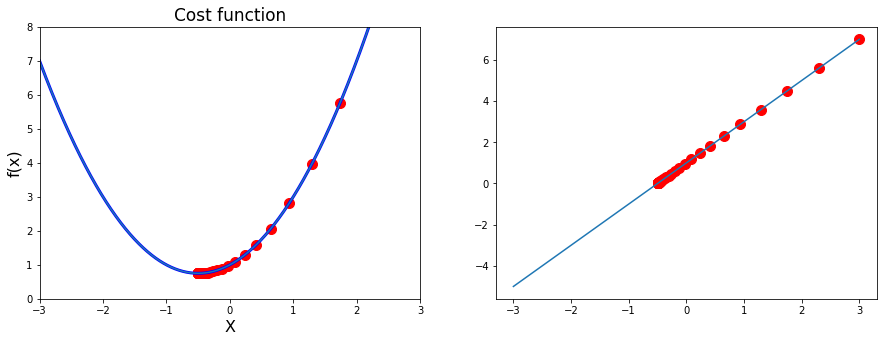

In [19]:
# Plot

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title("Cost function", fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("f(x)", fontsize=16)

plt.plot(x_1,f(x_1), color="blue", linewidth=3)

values = np.array(x_list)
plt.scatter(x_list,f(values),color="red", s=100)

plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x_1,f(x_1))

plt.subplot(1,2,2)
plt.plot(x_1, df(x_1))
plt.scatter(x_list,df(values),color="red", s=100)

plt.show()

In [11]:
# Python while loop
counter = 0
while counter < 5:
    print("Counting...", counter)
    counter += 1
print("Ready or not, here I come!")

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
Ready or not, here I come!


In [12]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x =  previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    #print(step_size)
    if step_size < precision:
        print("Loop ran this many times", n)
        break
    
print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ", df(new_x))
print(f"f(x) value or cost at his point is {f(new_x)}")

Loop ran this many times 40
Local minimum occurs at:  -0.49962781616118024
Slope or df(x) value at this point is:  0.0007443676776395236
f(x) value or cost at his point is 0.7500001385208099


## Example 2 - Multiple Minimal vs Initial Guess & Adanced Function
$$
g(x) = x^4 - 4x^2 + 5
$$

In [13]:
x_2 = np.linspace(-2,2,1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

## Gradient Descent as a Python Function

In [25]:
def gradient_descent(derivative_func,initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess  
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x =  previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=-0.5,
                                                 multiplier=0.01,
                                                 precision=0.001)
print(f"Local min occurs at: {local_min}")
print(f"Number od steps: {len(list_x)}")

Local min occurs at: -1.4090774204884804
Number od steps: 42


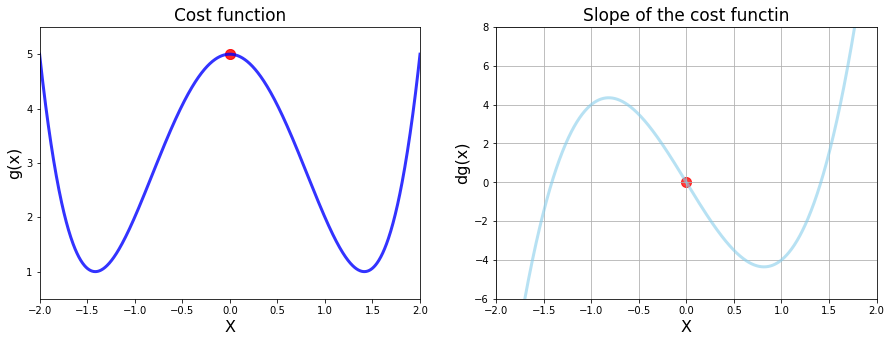

In [16]:
# ling gradient descenttfunction


local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, 
                                                 initial_guess=0)

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title("Cost function", fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x_2,g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)

# Derivative
plt.subplot(1,2,2)

plt.title("Slope of the cost functin", fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2,dg(x_2), color="skyblue", linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples
$$
h(x) = x^5 - 2x^4 + 2
$$

In [17]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

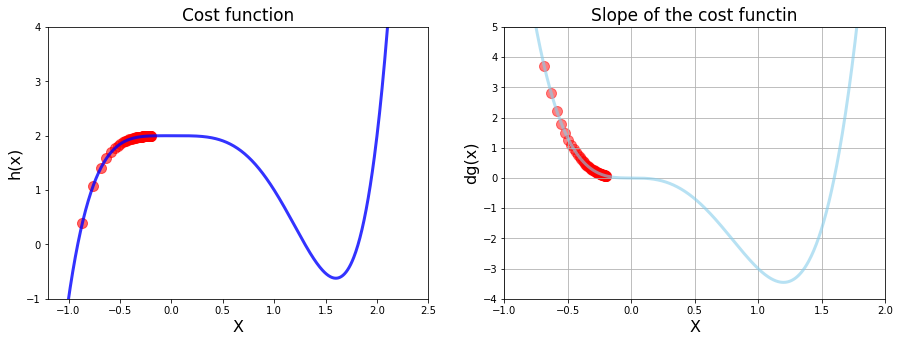

Local min occurs at: -2071072.4470816324
Cost at this minimum is: -3.810455326061589e+31
Number of steps: 71


In [28]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, 
                                                 initial_guess=-0.2,
                                                 max_iter=70)

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)

plt.xlim(-1.2,2.5)
plt.ylim(-1,4)

plt.title("Cost function", fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("h(x)", fontsize=16)

plt.plot(x_3,h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)

# Derivative
plt.subplot(1,2,2)

plt.title("Slope of the cost functin", fontsize=17)
plt.xlabel("X",fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.grid()
plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3,dh(x_3), color="skyblue", linewidth=3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)


plt.show()

print(f"Local min occurs at: {local_min}")
print(f"Cost at this minimum is: {h(local_min)}")
print(f"Number of steps: {len(list_x)}")

In [35]:
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Learning Rate

In [59]:
# ling gradient descenttfunction

n = 100

low_gamma = gradient_descent(derivative_func=dg,
                                initial_guess=3,
                                multiplier=0.0005,
                                precision=0.0001,
                                max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg,
                                initial_guess=3,
                                multiplier=0.001,
                                precision=0.0001,
                                max_iter=n)

high_gamma = gradient_descent(derivative_func=dg,
                                initial_guess=3,
                                multiplier=0.002,
                                precision=0.0001,
                                max_iter=n)

experimental_gamma = gradient_descent(derivative_func=dg,
                                initial_guess=3,
                                multiplier=0.25,
                                precision=0.0001,
                                max_iter=n)

plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title("Slope of the cost functin", fontsize=17)
plt.xlabel("Nr of iterations",fontsize=16)
plt.ylabel("Cost", fontsize=16)

low_values = np.array(low_gamma[1])

iteration_list = list(range(0,n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list,g(np.array(mid_gamma[1])), color='steelblue', s=80)

plt.plot(iteration_list,g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

plt.plot(iteration_list,g(np.array(experimental_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(experimental_gamma[1])), color='red', s=80)

plt.show()

OverflowError: (34, 'Numerical result out of range')